<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JoelOrlandoHR/blob/main/Reduccion_dimensiones_A00759664.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia y analítica de datos**
###Tecnológico de Monterrey
### **Semana 6** - **Actividad Semanal 5 - Repaso Transformación y reducción de dimensiones**
###Prof Jobish Vallikavungal Devassia
<br>

###Alumno: Joel Orlando Hernández Ramos
###Matrícula: A00759664



Fecha de entrega: Octubre 27, 2022

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [ ]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B= np.dot(np.dot(W,D),Winv)
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [ ]:
#Definimos matriz
A_1 = array([[3, 0, 2], [3, 0, -2], [0, 1,1]])

#La imprimimos. 
print("-------Matriz original-------")
print(A_1)
print("-----------------------------")

#La descomponemos

values, vectors = eig(A_1)
print(values) #D
print(vectors) #W

#La reconstruimos.

values, vectors = np.linalg.eig(A_1)

W_1 = vectors
W_1_inv = np.linalg.inv(W_1)
D_1 = np.diag(values)

print("-------Matriz reconstruida-------")

B_1= np.dot(np.dot(W_1,D_1),W_1_inv)
print(B_1.round(2).real) # TUVIMOS QUE AGREGAR ESTE METODO PARA OBTENER NUMEROS REALES ENTEROS. De otra manera, obteniamos numeros imaginarios y decimales.
print("-----------------------------")

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-------Matriz reconstruida-------
[[ 3.  0.  2.]
 [ 3.  0. -2.]
 [ 0.  1.  1.]]
-----------------------------


In [ ]:
#Definimos matriz
A2 = array([[1,3,8], [2,0,0], [0,0,1]])

#La imprimimos. 
print("-------Matriz original-------")
print(A2)
print("-----------------------------")

#La descomponemos

values, vectors = eig(A2)
print(values) #D
print(vectors) #W

#La reconstruimos.

values, vectors = np.linalg.eig(A2)

W2 = vectors
W2inv = np.linalg.inv(W2)
D2 = np.diag(values)

print("-------Matriz reconstruida-------")

B2= np.dot(np.dot(W2,D2),W2inv)
print(B2.round(2).real) # TUVIMOS QUE AGREGAR ESTE METODO PARA OBTENER NUMEROS REALES ENTEROS. De otra manera, obteniamos numeros imaginarios y decimales.
print("-----------------------------")

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
[ 3. -2.  1.]
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
-------Matriz reconstruida-------
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]
-----------------------------


In [ ]:
#Definimos matriz
A3 = array([[5,4,0], [1,0,1], [10,7,1]])

#La imprimimos. 
print("-------Matriz original-------")
print(A3)
print("-----------------------------")

#La descomponemos

values, vectors = eig(A3)
print(values) #D
print(vectors) #W

#La reconstruimos.

values, vectors = np.linalg.eig(A3)

W3 = vectors
W3inv = np.linalg.inv(W3)
D3 = np.diag(values)

print("-------Matriz reconstruida-------")

B3= np.dot(np.dot(W3,D3),W3inv)
print(B3.round(2).real) # TUVIMOS QUE AGREGAR ESTE METODO PARA OBTENER NUMEROS REALES ENTEROS. De otra manera, obteniamos numeros imaginarios y decimales.
print("-----------------------------")

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
[ 6.89167094 -0.214175   -0.67749594]
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
-------Matriz reconstruida-------
[[ 5.  4. -0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]
-----------------------------


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


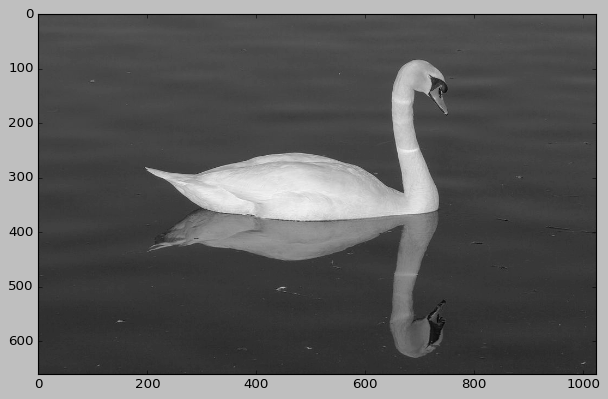

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F0527E21D10>


In [ ]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [ ]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [ ]:
U.shape

(660, 660)

In [ ]:
V.shape

(1024, 1024)

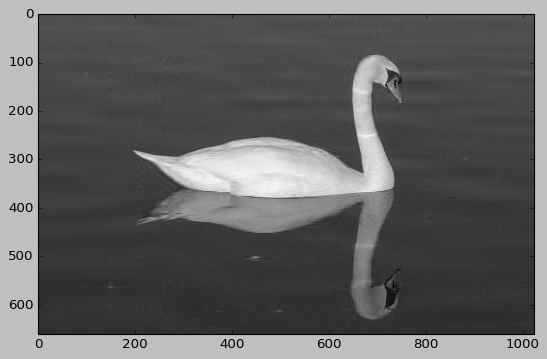

Felicidades la imagen está comprimida


In [ ]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[ 10.  10.  11. ... 105. 104. 105.]


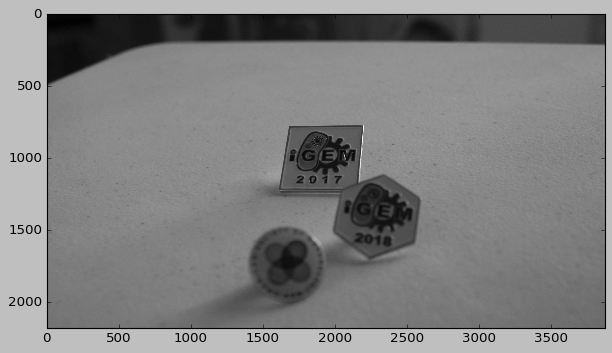

<PIL.Image.Image image mode=LA size=3872x2176 at 0x7F0513E04C50>


In [ ]:
#imagen 1


plt.style.use('classic')
#importanmos nuestra imagen desde nuestro repositorio de github. la imagen es de mi autoria. 
pins = Image.open(urllib.request.urlopen('https://github.com/PosgradoMNA/actividades-de-aprendizaje-JoelOrlandoHR/blob/main/PCA-SVD-EXERCISE/3%20dimensiones.PNG?raw=true')).convert('LA')
#convertimos nuestra imagen en blanco y negro
pinsgray = pins.convert('LA')
pinmat = np.array(list(pinsgray.getdata(band=0)),float)

print(pinmat)

pinmat.shape = (pinsgray.size[1],pinsgray.size[0])

#definimos el tamaño de nuestra figura.
plt.figure(figsize=(9,6))
plt.imshow(pinmat,cmap='gray')
plt.show()
print(pins)

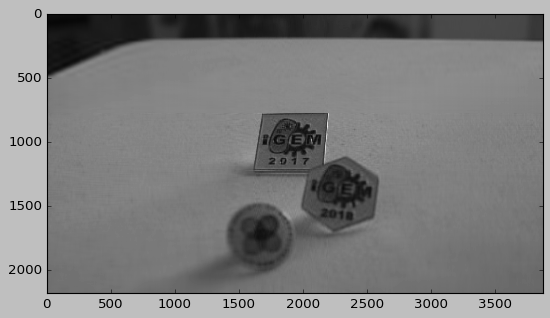

Felicidades la imagen está comprimida


In [ ]:
U,D,V = np.linalg.svd(pinmat)
#segun nuestro analisis a un si jugamos con el n value vamos a obtener mayor o menos compresion de la imagen.
#Claramente a una mayor compresion más elementos perdemos. 
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")


[144. 154. 168. ...  66.  69.  68.]


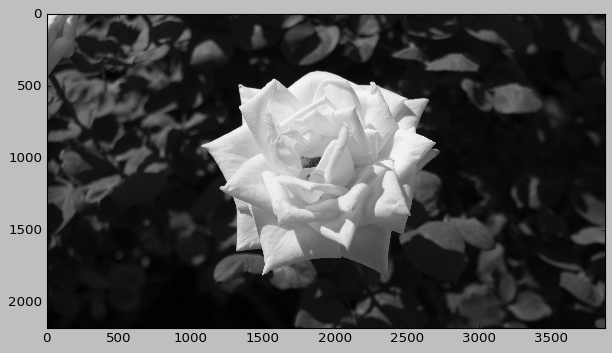

<PIL.Image.Image image mode=LA size=3872x2176 at 0x7F051C1A0650>


In [ ]:
#imagen 2

plt.style.use('classic')
#importanmos nuestra imagen desde nuestro repositorio de github. la imagen es de mi autoria. 
flower = Image.open(urllib.request.urlopen('https://github.com/PosgradoMNA/actividades-de-aprendizaje-JoelOrlandoHR/blob/main/PCA-SVD-EXERCISE/centro%20de%20interes.PNG?raw=true')).convert('LA')
#convertimos nuestra imagen en blanco y negro
flowergray = flower.convert('LA')
flowermat = np.array(list(flowergray.getdata(band=0)),float)

print(flowermat)

flowermat.shape = (flowergray.size[1],flowergray.size[0])

#definimos el tamaño de nuestra figura.
plt.figure(figsize=(9,6))
plt.imshow(flowergray,cmap='gray')
plt.show()
print(flower)

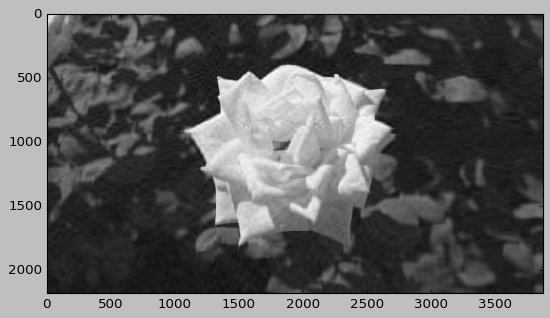

Felicidades la imagen está comprimida


In [ ]:
U,D,V = np.linalg.svd(flowermat)

#segun nuestro analisis a un si jugamos con el n value vamos a obtener mayor o menos compresion de la imagen.
#Claramente a una mayor compresion más elementos perdemos. 
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[19. 18. 19. ... 20. 21. 20.]


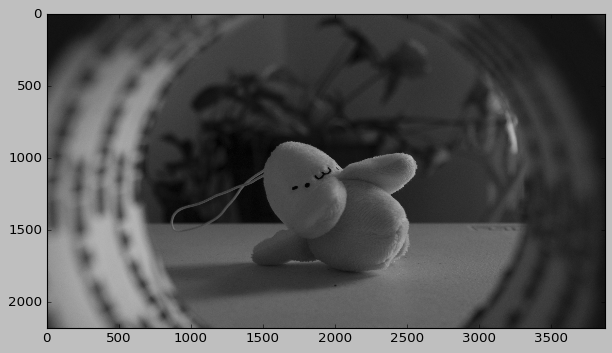

<PIL.Image.Image image mode=LA size=3872x2176 at 0x7F0515437710>


In [ ]:
#imagen 3

plt.style.use('classic')
#importanmos nuestra imagen desde nuestro repositorio de github. la imagen es de mi autoria. 
banana = Image.open(urllib.request.urlopen('https://github.com/PosgradoMNA/actividades-de-aprendizaje-JoelOrlandoHR/blob/main/PCA-SVD-EXERCISE/Marco.PNG?raw=true')).convert('LA')
#convertimos nuestra imagen en blanco y negro
bananagray = banana.convert('LA')
bananamat = np.array(list(bananagray.getdata(band=0)),float)

print(bananamat)

bananamat.shape = (bananagray.size[1],bananagray.size[0])

#definimos el tamaño de nuestra figura.
plt.figure(figsize=(9,6))
plt.imshow(bananagray,cmap='gray')
plt.show()
print(banana)

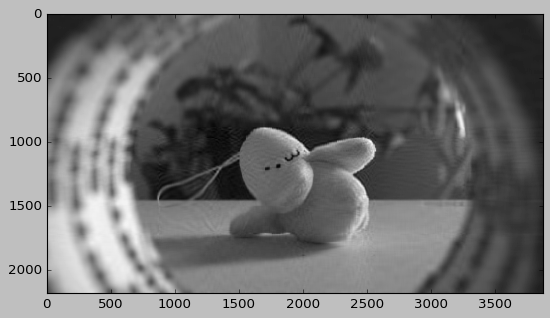

Felicidades la imagen está comprimida


In [ ]:
U,D,V = np.linalg.svd(bananamat)
#segun nuestro analisis a un si jugamos con el n value vamos a obtener mayor o menos compresion de la imagen.
#Claramente a una mayor compresion más elementos perdemos. 
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [ ]:
#tu codigo aqui
#Comenzamos a importar las librerias necesarias para este ejercicio
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
#deifinimos la gráfica que vamos a usar más adelante
plt.style.use('ggplot')
# Cargamos nuestra informacion y definimos nuestra variable de salida y las variables de entradas
iris = datasets.load_iris()
X = iris.data
y = iris.target
# transformamos nuestros datos de entrada con la funcion StandardScalar
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimamos solamente dos principales componentes
X_new = pca.fit_transform(X) # transformamos los datos originales en el espacio de los PC para poder graficarlos posteriormente. 

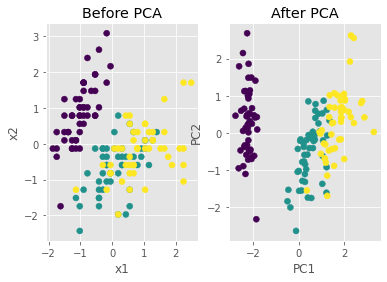

In [ ]:
#Ahora si que tenemos ambos datos en la misma escala o espacio podemos hacer una gráfica comparativa
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [ ]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


Con lo anterior nos podemos dar cuenta de que los dos primeros componentes alcanzan para explicar un total del 95% de la varianza de nuestra dataset. 

Matematicamente podemos demostrar que  prueba de máxima varianza también se puede ver estimando la matriz de covarianza del espacio reducido.

In [ ]:
np.cov(X_new.T)

array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

In [ ]:
pca.explained_variance_


array([2.93808505, 0.9201649 ])

Como podemos ver, los valores de la matriz de covarianza para X original adaptado al espacio reducido (el espacio del PCA)  son los mismos deque la varianza explicada por los dos factores principales. 

**IMPORTANCIA DE LAS VARIABLES**

In [ ]:
print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


En este resultado es importante recalacar que las lineas se refieren al numero de componentes es decir dos renglones y las columnas al número de variables. En este sentido, podemos concluir que la variable 1, 3 y 4 en el PC1 tienen una importancia similar.

Por otro lado, en el PC2, la segunda variable tiene una importancia mucho mayor. 

In [ ]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

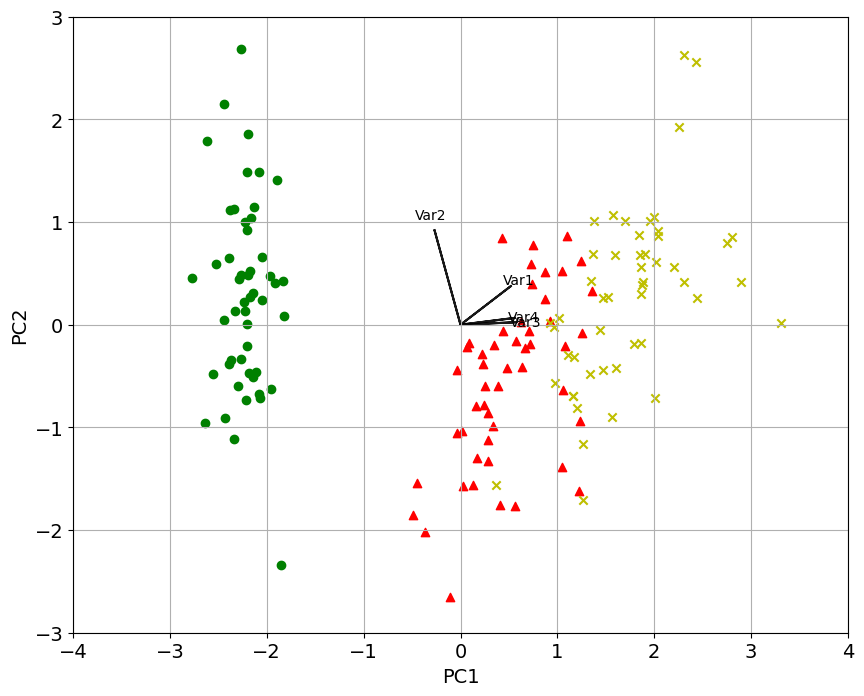

In [ ]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

Con esta gráfica, además, de confirmar las conclusiones que ya teniamos podemos ver la dirección de las variables y de sus magnitudes.

En este sentido, las flechas que apuntan hacia la misma dirección muestran una correlación. Mientras que las que estan volteando a direcciones contrarias representan un contraste. Esto lo podemos verificar de la siguiente manera.

In [ ]:
# Var 2and Var 3 are negatively correlated
np.corrcoef(X[:,1], X[:,2])[1,0]


-0.42844010433054014

In [ ]:
# Var 3 and Var 4 are extremely positively correlated
np.corrcoef(X[:,2], X[:,3])[1,0]

0.9628654314027957

**Describe lo relevante del ejercicio y que descubriste de las variables análizadas.** 

Tanto con el PCA, cómo con el análisis de PCA, nos pudimos dar cuenta que el 95% de nuestra varianza iba a ser explicada solemente con dos componentes principales. Adicionalmente, podemos concluir que la variable 1, 3 y 4 en el PC1 tienen una importancia similar con una magnitud de alrededor de ~.50. La dirección de estas magnitudes es positiva por lo que podemos asumir que tienen una correlacion.  Por otro lado, en PC2, las variable 2 tiene la importancia más fuerte dada su magntidu mayor a .90 y tiene una dirección negativa. Por lo tanto podemos inferir que la variable 2 no tiene correlación con las demás.

## **Preguntas**

####*Realiza un comentario relacionado a los pasos que se llevaron a cabo en este proceso de features importances.*

En especifico en este ejercicio de 3 de feature importance podemos resumir que los pasos fueron los siguientes:

1. Importación de liberias: En este caso, importamos liberías de pandas, numpy, matplotlib y scikitlearn para poder hacer dataframes, operaciones matematicas, gráficos y funciones como PCA, Standard Scaler, respectivamente. 

2. Importación de nuestros datos: Primero comenzamos por importar nuestro dataset. En este caso es un dataset de 3 colores de Iris. también definimos nuestras variables de entrada y nuestra variable de salida. 

3. Ajustar a una escala: Nuestros datos originales fueron escalados con StandardScaler y transformados. 

4. Realizar PCA: Con estos nuevos datos realizamos la PCA utilizando la función de scikitlearn. Adicionalmente, los datos originales los escalamos y transformamos al espacio de PCA para volverlo comparable a los resultados obtenidos. 

5.  Análisis de resultados iniciales: En este punto podemos por medio de una gráfica comparar los resultados obtenidos por nuestro PCA comparado con los datos originales en el mismo espacio. Además, en este paso debemos de darnos cuenta cuanta varianza queda explicada en nuestros componentes principales.  

6. Análisis de componentes: Finalmente, para terminar de comprender la relación de entre nuestras variables respecto a nuestros componentes principales, realizamos un análisis de componentes. Esto nos va arrojar la magnitud y dirección de cada componente respecto a los componentes principales. De esta manera podemos saber la importancia de las variables

####*¿Qué es feature importance y para que nos sirve?*

Feature importance o la importancia de las variables/características de un modelo se refiere a una "puntuación" que determina que tan representativa es esa característica o variable. Una mayor importancia o representatividad quiere decir que tendrá un mayor efecto en nuestro modelo para predecir la variable de salida. Es importante mencionar que existen diferentes técnicas de calcular la importancia o puntación de una variable. En el caso específico de este ejercicio se calculo la importancia de las variables dentro del Análisis de Componentes principales. Esto quiere decir, que con lo que hicimos en el ejercicio determinamos que variables tienen un mayor peso a la hora de calcular cada uno de los componentes principales (PC1 y PC2).

De manera general, la feature importance nos es útil para tres aspectos. Primero, el conocer el ponderar la importancia de nuestras variables nos ayuda a comprender mejor nuestro modelo por medio de entender la relación que existe entre las variables de entrada y la variable objetivo. 

Adicionalmente, el conocer los puntajes de cada variable nos puede ayudar a reducir la dimensionalidad de nuestro modelo. Usualmente, las variables con puntajes más altos son utilizados mientras que los de menores puntajes son descartados.

Finalmente, el feature importance nos sirve también para darle una mejor interpretación a nuestro modelo a la hora de presentarles a los directivos de una empresa, por ejemplo.


####*¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?*

Tanto con el PCA, cómo con el análisis de PCA, nos pudimos dar cuenta que el 95% de nuestra varianza iba a ser explicada solamente con dos componentes principales. Adicionalmente, podemos concluir que la variable 1, 3 y 4 en el PC1 tienen una importancia similar con una magnitud de alrededor de ~.50. La dirección de estas magnitudes es positiva por lo que podemos asumir que tienen una correlación.  Por otro lado, en PC2, la variable 2 tiene la importancia más fuerte dada su magnitud mayor a .90 y tiene una dirección negativa. Por lo tanto, podemos inferir que la variable 2 no tiene correlación con las demás.

####*¿Dónde lo aplicarías o te sería de utilidad este conocimiento?*
Personalmente, yo creo que esta técnica del feature importance podría ser utilizada en dos casos. Primero, el feature importance se puede utilizar en casos donde tenemos un dataset con una cantidad muy grande de variables o características. Esto porque, dentro de la ciencia de datos, hay varios expertos que apoyan el principio de que, en una base de datos muy grande, no todas las dimensiones tienen la misma importancia. En este sentido, como ya lo mencionamos, el feature importance nos puede ayudar a ajustar la dimensionalidad de nuestro modelo simplificándolo. 

Adicionalmente, yo creo que la importancia de variables sería aplicable cuando nos encontremos en un caso donde tengas muestras muy desbalanceadas. Dentro de la maestría hemos visto que hay ocasiones donde nuestro modelo debe de ajustar el imbalance de las clases. En este sentido, conocer la importancia de nuestras variables puede ser importante para saber el peso que cada clase tiene en el modelo.


**Referencias:**

Hartmann, K., Krois, J., Waske, B. (2018): E-Learning Project SOGA: Statistics and Geospatial Data Analysis. Department of Earth Sciences, Freie Universitaet Berlin.

Jaadi. (2022). A Step-by-Step Explanation of Principal Component Analysis (PCA). Built In. Retrieved 11 October 2022, from https://builtin.com/data-science/step-step-explanation-principal-component-analysis.

Towards Data Science. (2021). Understanding feature importance and how to implement it in Python. Towards Data Science. Retrieved October 27, 2022, from https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285 